In [106]:
# python prerequisities

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
%config Completer.use_jedi = False

sns.set(font_scale=2,
        style="ticks",
        rc={
            "axes.titlesize": 24,
            "axes.labelsize": 20,
            'xtick.labelsize': 20,
            'ytick.labelsize': 20
        })

In [107]:
def readCsv(filename, offset, source, hardware):
    
    todel = 5 # delete first and last todel rows
    
    run = pd.read_csv(filename, delimiter=",")
    run["time"] = pd.to_datetime(run["time"], infer_datetime_format=True)  + offset
    
    startTime = run.iloc[0]["time"]
    print(startTime)
    
    run["time"] = run["time"] - startTime
    
    # calculate speed
    run['d_distance'] = run['distance'].diff()
    run['d_time'] = run['time'].diff()
    run['speed_calc'] = run['d_distance'] / run['d_time'].dt.total_seconds()
    
    # remove zeros - don't do it, it will remove also artifacts, which are important
    #     run = run[run.speed_calc != 0]
    # delete first todel first and last rows
    run = run.iloc[todel:]
    run = run.drop(run.tail(todel).index) # drop last n rows
    
    run["speed_rolling_5s"] = run["speed_calc"].rolling(5).mean()
    run["speed_rolling_10s"] = run["speed_calc"].rolling(10).mean()
    run["speed_rolling_15s"] = run["speed_calc"].rolling(15).mean()
    run["source"] = source
    run["hardware"] = hardware
    
    return run


In [108]:
run = {}

# gps+fp
run[1] = {}
run[1]["g"] = readCsv("2-csv/forerunner-82911648.csv", pd.DateOffset(hours=2), "garmin", "gps+footpod")
run[1]["p"] = readCsv("2-csv/polar2021-10-24_18-46-22.csv", pd.DateOffset(months=1, days=-1, hours=0,seconds=28), "polar", "gps+footpod")


# gps only
run[2] = {}
run[2]["g"] = readCsv("2-csv/forerunner-82912399.csv", pd.DateOffset(hours=2), "garmin", "gps")
run[2]["p"] = readCsv("2-csv/polar2021-10-24_18-58-31.csv", pd.DateOffset(months=1, days=-1, hours=0,seconds=23), "polar", "gps")


# fp only
run[3] = {}
run[3]["g"] = readCsv("2-csv/forerunner-82912973.csv", pd.DateOffset(hours=2), "garmin", "footpod")
run[3]["p"] = readCsv("2-csv/polar2021-10-24_19-11-09.csv", pd.DateOffset(months=1, days=-1, hours=0,seconds=23), "polar", "footpod")



run[1]["p"].head(5)

2021-11-23 18:46:51+00:00
2021-11-23 18:46:51+00:00
2021-11-23 18:58:55+00:00
2021-11-23 18:58:55+00:00
2021-11-23 19:11:32+00:00
2021-11-23 19:11:33+00:00


,time,latitude,longitude,distance,cadence,altitude,d_distance,d_time,speed_calc,speed_rolling_5s,speed_rolling_10s,speed_rolling_15s,source,hardware
5,0 days 00:00:05,52.131850,21.071640,5.800000,0.0,NaN,2.5,0 days 00:00:01,2.5,NaN,NaN,NaN,polar,gps+footpod
6,0 days 00:00:06,52.131842,21.071677,8.500000,57.0,NaN,2.7,0 days 00:00:01,2.7,NaN,NaN,NaN,polar,gps+footpod
7,0 days 00:00:07,52.131829,21.071711,11.600000,67.0,NaN,3.1,0 days 00:00:01,3.1,NaN,NaN,NaN,polar,gps+footpod
8,0 days 00:00:08,52.131813,21.071743,15.100000,73.0,NaN,3.5,0 days 00:00:01,3.5,NaN,NaN,NaN,polar,gps+footpod
9,0 days 00:00:09,52.131794,21.071769,18.700001,76.0,NaN,3.6,0 days 00:00:01,3.6,3.08,NaN,NaN,polar,gps+footpod


In [109]:
concatenated = pd.concat([
    run[1]["g"], run[1]["p"], run[2]["g"], run[2]["p"], run[3]["g"],
    run[3]["p"]
],
                         ignore_index=True)

concatenated

,time,latitude,longitude,altitude,distance,hr,speed,d_distance,d_time,speed_calc,speed_rolling_5s,speed_rolling_10s,speed_rolling_15s,source,hardware,cadence
0,0 days 00:00:05,52.131826,21.071474,113.800003,12.400000,91.0,2.865,2.860000,0 days 00:00:01,2.860000,NaN,NaN,NaN,garmin,gps+footpod,NaN
1,0 days 00:00:06,52.131818,21.071516,114.000000,15.260000,99.0,2.855,2.860001,0 days 00:00:01,2.860001,NaN,NaN,NaN,garmin,gps+footpod,NaN
2,0 days 00:00:07,52.131803,21.071558,114.000000,18.120001,99.0,2.865,2.860001,0 days 00:00:01,2.860001,NaN,NaN,NaN,garmin,gps+footpod,NaN
3,0 days 00:00:08,52.131782,21.071595,114.000000,20.990000,99.0,2.874,2.869999,0 days 00:00:01,2.869999,NaN,NaN,NaN,garmin,gps+footpod,NaN
4,0 days 00:00:09,52.131759,21.071620,114.000000,23.889999,105.0,2.893,2.900000,0 days 00:00:01,2.900000,2.870000,NaN,NaN,garmin,gps+footpod,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,0 days 00:09:22,52.132202,21.071351,106.072000,1717.800049,NaN,NaN,2.100098,0 days 00:00:01,2.100098,2.920020,3.630005,3.726668,polar,footpod,79.0
3400,0 days 00:09:23,52.132193,21.071334,106.072000,1719.400024,NaN,NaN,1.599976,0 days 00:00:01,1.599976,2.480005,3.340002,3.593335,polar,footpod,79.0
3401,0 days 00:09:24,52.132184,21.071325,106.529000,1720.800049,NaN,NaN,1.400024,0 days 00:00:01,1.400024,2.100000,3.030005,3.440007,polar,footpod,79.0
3402,0 days 00:09:25,52.132176,21.071322,106.529000,1721.800049,NaN,NaN,1.000000,0 days 00:00:01,1.000000,1.720020,2.690002,3.246672,polar,footpod,79.0


Time vs speed
Time vs speed (smooth 5s window)


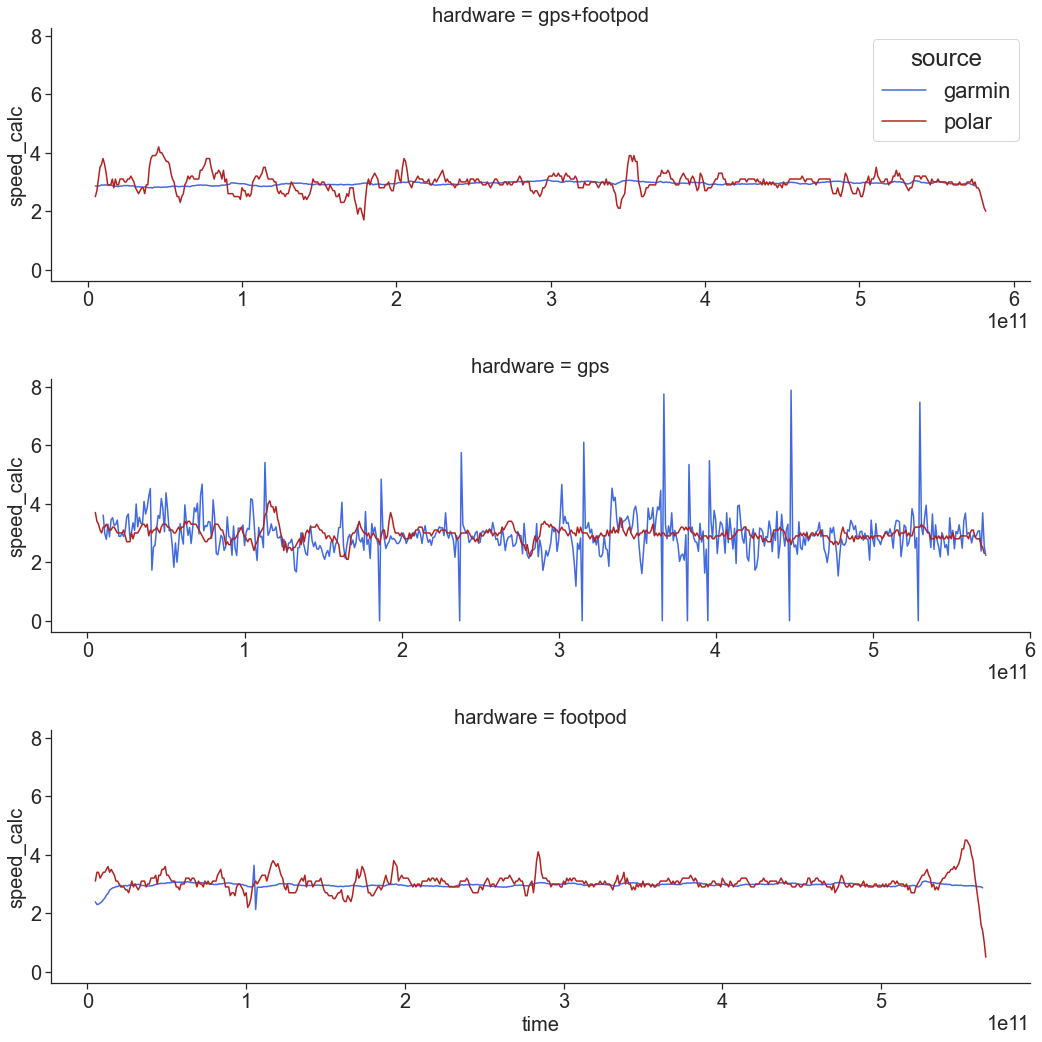

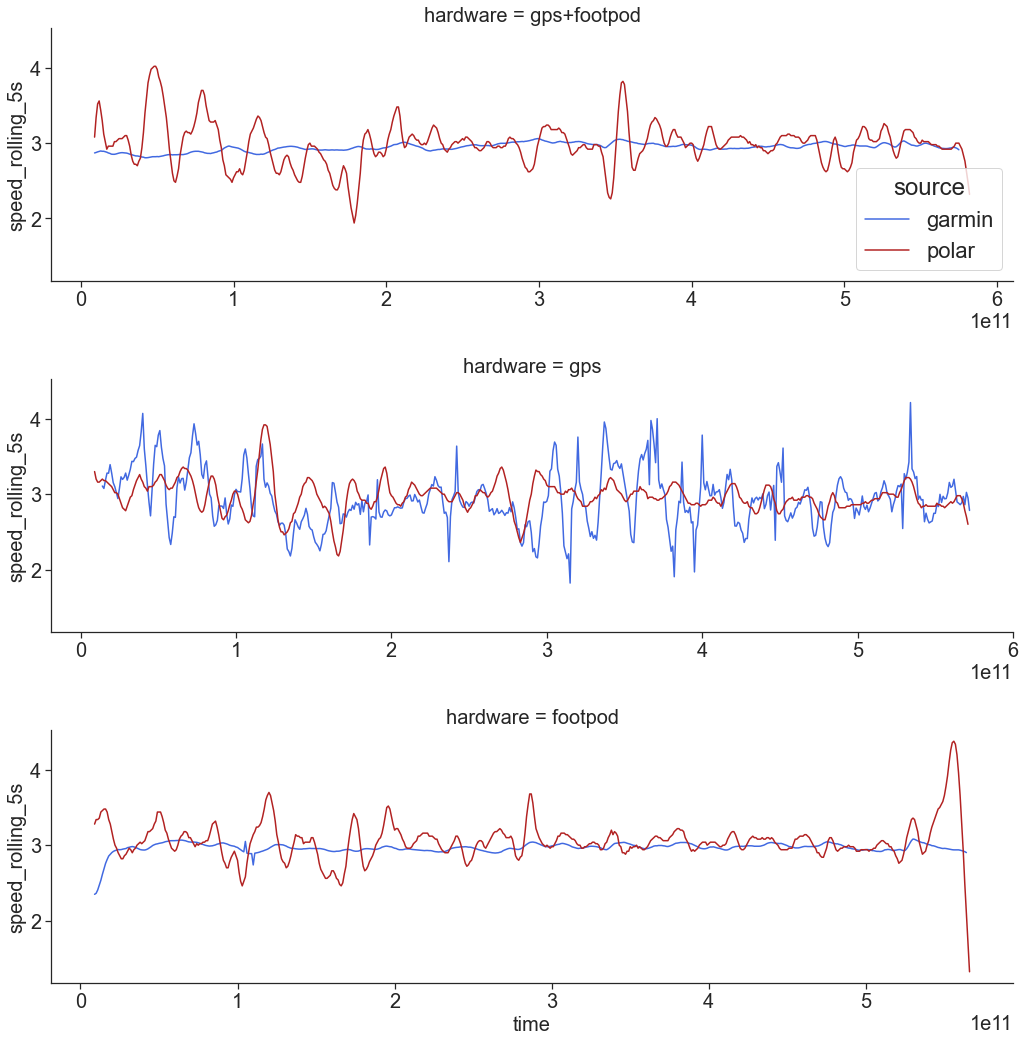

In [110]:
# fig, ax = plt.subplots(figsize=(16, 6))


def drawPlot(x='time', y='speed_calc'):
    g = sns.FacetGrid(concatenated,
                  row="hardware",
                  hue="source",
                  height=5,
                  aspect=3,
                  palette=['royalblue', 'firebrick'],
                  legend_out=False,
                  sharex=False)
    g.map(sns.lineplot, x, y)
    g.add_legend()


print("Time vs speed")
drawPlot(x='time', y='speed_calc')

print("Time vs speed (smooth 5s window)")
drawPlot(x='time', y="speed_rolling_5s")

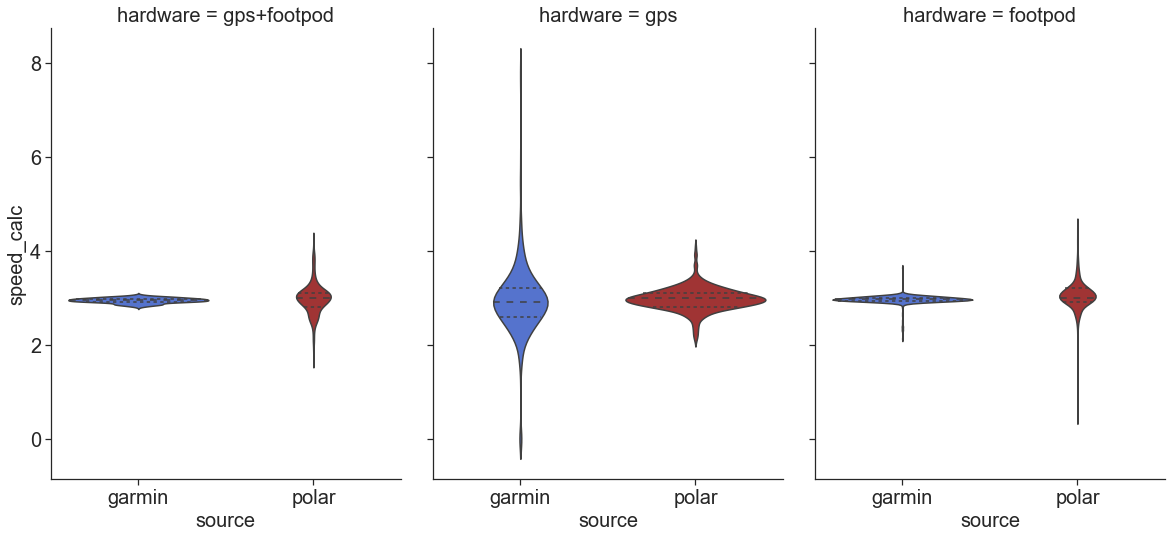

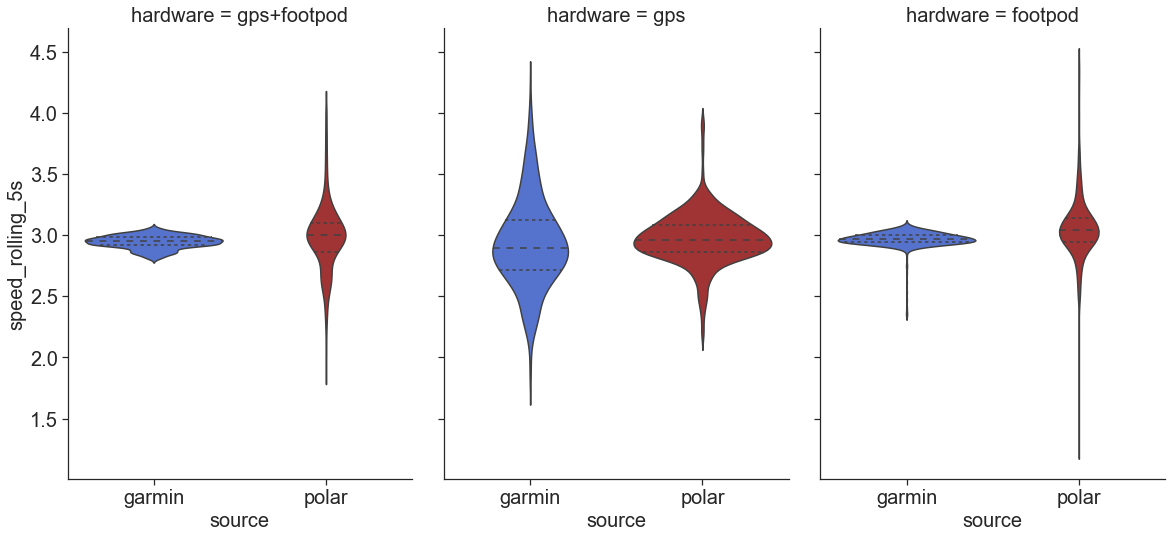

In [111]:
# swarm plot

ax = sns.catplot(x="source",
                y="speed_calc",
                col="hardware",
                data=concatenated,
                kind="violin",
                inner="quartile",
                palette=['royalblue', 'firebrick'],
                height=8,
                aspect=0.7)

ax = sns.catplot(x="source",
                y="speed_rolling_5s",
                col="hardware",
                data=concatenated,
                kind="violin",
                inner="quartile",
                palette=['royalblue', 'firebrick'],
                height=8,
                aspect=0.7)

In [112]:
print (concatenated[['speed_calc', 'hardware', 'source']].groupby(['hardware', 'source']).describe().to_html())

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="8" halign="left">speed_calc</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
    <tr>
      <th>hardware</th>
      <th>source</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">footpod</th>
      <th>garmin</th>
      <td>560.0</td>
      <td>2.963607</td>
      <td>0.092579</td>
      <td>2.130005</td>
      <td>2.940002</td>
      <td>2.969971</td>
      <td>3.000000</td>
      <td>3.639984</td>
    </tr>
    <tr>
      <th>polar</th>
      <td>562.0</td>
      <td>3.048577</td>
      <td>0.322103</td>
      <td>0.500000</td>
      <td>2.900024</td>
     